In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sample data
study_hours = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
exam_scores = np.array([60, 70, 80, 85, 90, 95, 92, 88, 93])

# Reshape the data to fit the model
X = study_hours.reshape(-1, 1)  # Features (study hours)
y = exam_scores  # Target variable (exam scores)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 44.16326530612235
R-squared: 0.4547745023935512


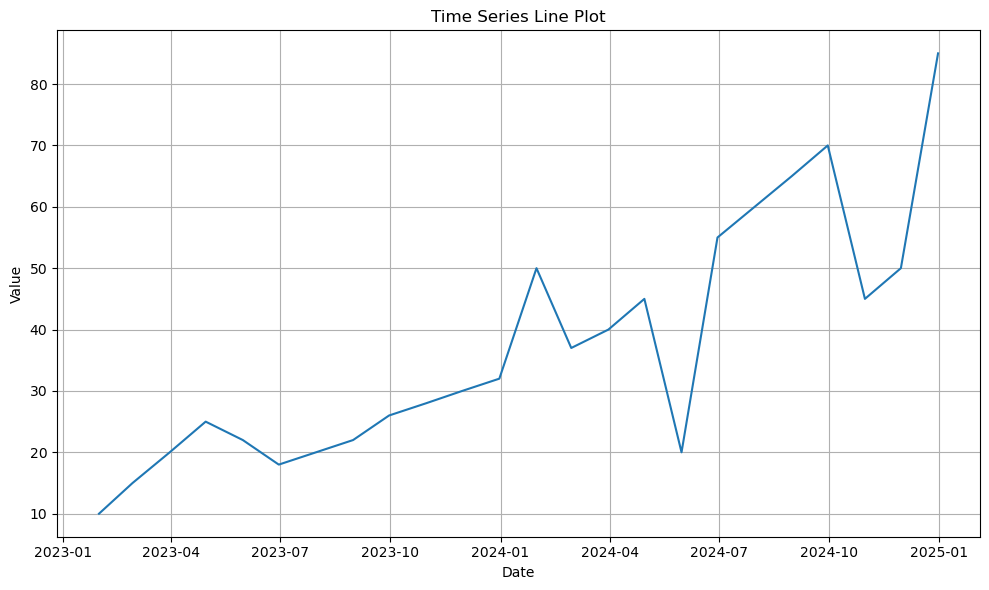

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample time series data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=24, freq='M'),
    'Value': [10, 15, 20, 25, 22, 18, 20, 22, 26, 28, 30, 32, 50, 37, 40, 45, 20, 55, 60, 65, 70, 45, 50, 85]
}

df = pd.DataFrame(data)

# Plot the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Line Plot')
plt.grid()
plt.tight_layout()
plt.show()

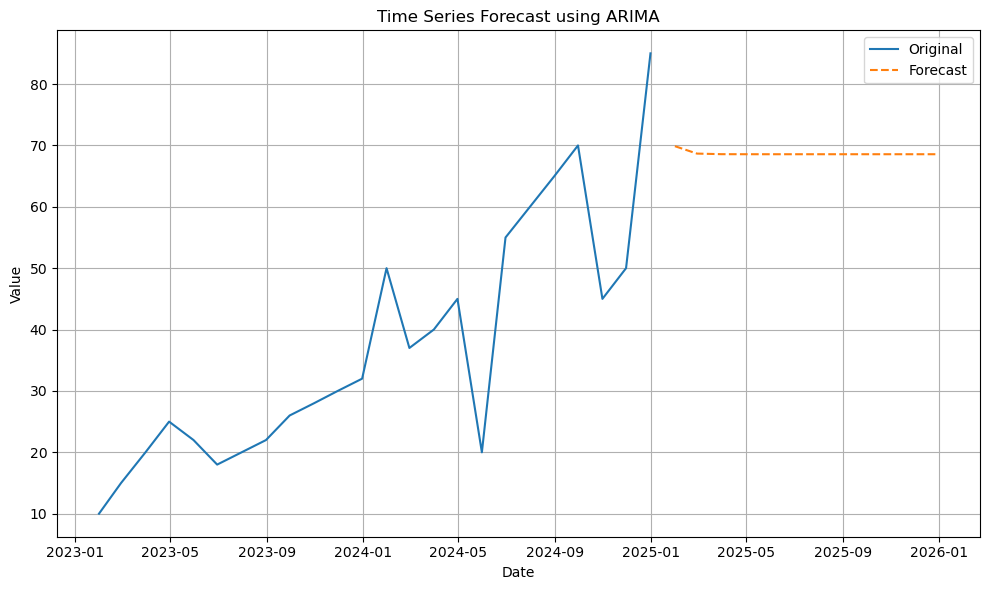

In [13]:
# Fit the ARIMA model
model = sm.tsa.ARIMA(df['Value'], order=(1, 1, 1))
results = model.fit()

# Forecast future values
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

# Create dates for the forecasted values
forecast_dates = pd.date_range(start=df['Date'].max(), periods=forecast_steps + 1, freq='M')[1:]

# Plot the original time series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Value'], label='Original')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast using ARIMA')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Accuracy: 0.7


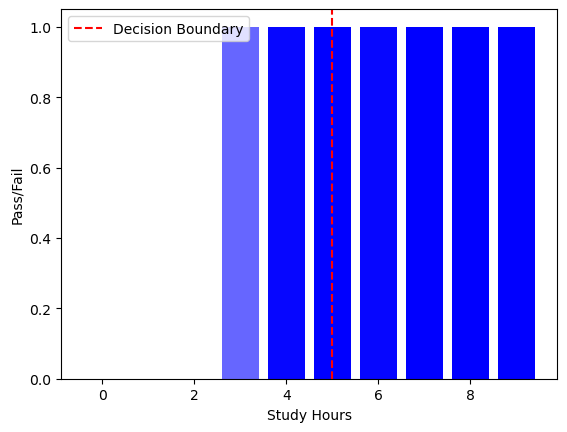

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(0)
study_hours = np.random.randint(0, 10, size=100)
passed_exams = np.where(study_hours + np.random.normal(scale=1.5, size=100) > 5, 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(study_hours.reshape(-1, 1), passed_exams, test_size=0.2, random_state=42)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy as an evaluation metric
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the bar chart and decision boundary
plt.bar(study_hours, passed_exams, color='blue', alpha=0.6)
plt.axvline(x=5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Study Hours")
plt.ylabel("Pass/Fail")
plt.legend()
plt.show()
